Experiment with depth(number of layers)

Model 1:
Build a model with one hidden layer, and train it
Find the vaalidation accuracy.
(128)

Model 2:
Build a model with 3 hidden layers and train it
Find the vaalidation accuracy.   
(1024,512,256)

Model 3:
Build a model with 5 hidden layers and 
Find the vaalidation accuracy
(1024,512,256,128,64)


plot the vaalidation accuracy for all 3 models in a single plot

plot the vaalidation loss for all 3 models

In [1]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import SGD,RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [2]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time


d:\Day2_AI\ai_bootcamp\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2974 - loss: 1.9723 - val_accuracy: 0.3335 - val_loss: 1.8706
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3654 - loss: 1.8074 - val_accuracy: 0.3743 - val_loss: 1.7842
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3911 - loss: 1.7425 - val_accuracy: 0.3860 - val_loss: 1.7638
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4082 - loss: 1.6965 - val_accuracy: 0.4028 - val_loss: 1.7042
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4210 - loss: 1.6578 - val_accuracy: 0.4005 - val_loss: 1.6962
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4303 - loss: 1.6250 - val_accuracy: 0.4115 - val_loss: 1.6802
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4389 - loss: 1.6003 - val_accuracy: 0.4072 - val_loss: 1.6742
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4498 - loss: 1.5751 - val_accuracy: 0.

In [3]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4320 - loss: 1.5975
test loss:1.5974876880645752
test accuracy:0.4320000112056732


In [4]:
model_SGD= Sequential()
model_SGD.add(Flatten(input_shape =(32,32,3)))
model_SGD.add(Dense(1024,'relu'))  #layer containg 1024 neuron 
model_SGD.add(Dense(512,'relu'))
model_SGD.add(Dense(256,'relu'))
model_SGD.add(Dense(10,'softmax'))       #10 neurons last layer
model_SGD.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result2=model_SGD.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3095 - loss: 1.9335 - val_accuracy: 0.3598 - val_loss: 1.8068
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3820 - loss: 1.7500 - val_accuracy: 0.3934 - val_loss: 1.7092
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4096 - loss: 1.6670 - val_accuracy: 0.4113 - val_loss: 1.6682
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4308 - loss: 1.6124 - val_accuracy: 0.4346 - val_loss: 1.6056
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4471 - loss: 1.5652 - val_accuracy: 0.4426 - val_loss: 1.5779
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4608 - loss: 1.5279 - val_accuracy: 0.4575 - val_loss: 1.5386
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4721 - loss: 1.4966 - val_accuracy: 0.4604 - val_loss: 1.5417
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4841 - loss: 1.4626 - val_acc

In [5]:
loss,accuracy = model_SGD.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4797 - loss: 1.4698
test loss:1.4698281288146973
test accuracy:0.4796999990940094


In [6]:
model_SGD5= Sequential()
model_SGD5.add(Flatten(input_shape =(32,32,3)))
model_SGD5.add(Dense(1024,'relu'))  #layer containg 1024 neuron 
model_SGD5.add(Dense(512,'relu'))
model_SGD5.add(Dense(256,'relu'))
model_SGD5.add(Dense(128,'relu'))
model_SGD5.add(Dense(64,'relu'))
model_SGD5.add(Dense(10,'softmax'))       #10 neurons last layer
model_SGD5.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result3=model_SGD5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.2788 - loss: 1.9990 - val_accuracy: 0.3191 - val_loss: 1.8947
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3610 - loss: 1.7855 - val_accuracy: 0.3921 - val_loss: 1.7184
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3995 - loss: 1.6874 - val_accuracy: 0.4002 - val_loss: 1.6852
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4210 - loss: 1.6225 - val_accuracy: 0.3973 - val_loss: 1.6697
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4443 - loss: 1.5727 - val_accuracy: 0.4141 - val_loss: 1.6318
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4547 - loss: 1.5261 - val_accuracy: 0.4441 - val_loss: 1.5679
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4714 - loss: 1.4888 - val_accuracy: 0.4712 - val_loss: 1.5044
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4819 - loss: 1.4524 - val_acc

In [7]:
loss,accuracy = model_SGD5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4851 - loss: 1.4506
test loss:1.450563669204712
test accuracy:0.48510000109672546


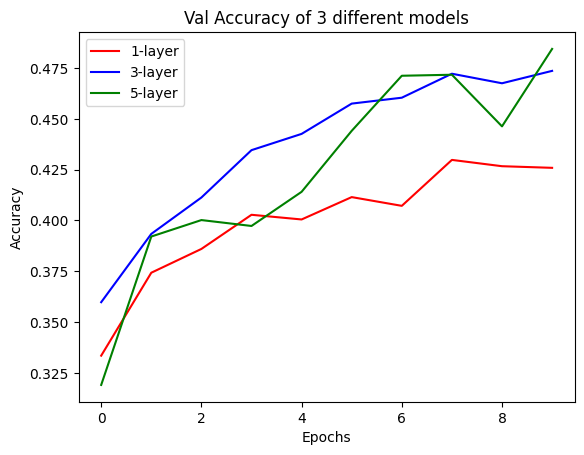

In [8]:
plt.plot(result.history['val_accuracy'],label='1-layer',color='red')
plt.plot(result2.history['val_accuracy'],label='3-layer',color='blue')
plt.plot(result3.history['val_accuracy'],label='5-layer',color='green')
plt.title("Val Accuracy of 3 different models")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

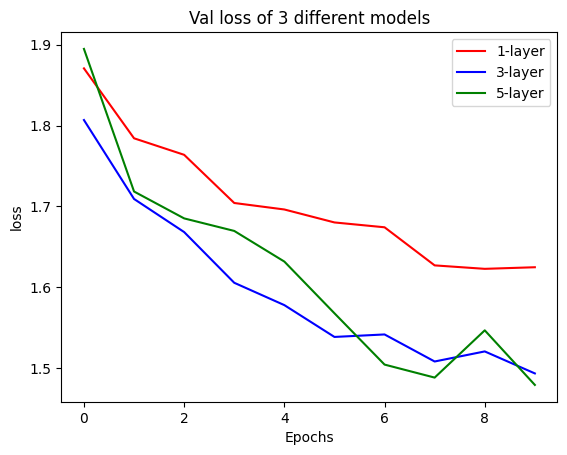

In [9]:
plt.plot(result.history['val_loss'],label='1-layer',color='red')
plt.plot(result2.history['val_loss'],label='3-layer',color='blue')
plt.plot(result3.history['val_loss'],label='5-layer',color='green')
plt.title("Val loss of 3 different models")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()